In [1]:
from isodisreg import idr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get data
rain = idr.load_rain()
varNames = rain.columns[3:55]

## Example 1: idr() and predict()

In [4]:
X = rain[varNames][0:185]
y = rain['obs'][0:185]
data = rain[varNames][185:186]

# Define groups and orders
values = np.ones(52)+1
values[0:2] = 1
groups = dict(zip(varNames, values))
orders = dict({"1":"comp", "2":"icx"})

# compute idr
fit = idr.idr(y = y, X = X, orders = orders, groups = groups)

# fit idr / make prediction
preds1 = fit.predict()
preds2 = fit.predict(data)

100% (41 of 41) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


## Example 2: cdf(), qpred(), qscore(), bscore() and crps()

In [5]:
# cdf
X = rain[["HRES"]][0:(3*365)]
y = rain['obs'][0:(3*365)]
data = pd.DataFrame({"HRES": [0, 0.5, 1]}, columns = ["HRES"])
fit = idr.idr(y = y, X = X)
preds1 = fit.predict(data)
cdf0 = preds1.cdf(thresholds = 0)
print(1-np.array(cdf0))

[0.031 0.348 0.683]


In [6]:
# qpred
data = pd.DataFrame({"HRES": [2.5, 5, 10]}, columns = ["HRES"])
preds2 = fit.predict(data)
qpredict = preds2.qpred(quantiles = 0.95)
print(qpredict)
# qscore
data = rain[["HRES"]][(3*365):(5*365)]
obs = rain["obs"][(3*365):(5*365)]
preds3 = fit.predict(data)

[[ 7.4]
 [11. ]
 [19. ]]


In [7]:
obs = rain["obs"][(3*365):(5*365)]
print("Mean Qscore:", np.mean(preds3.qscore(0.5, obs)))

# bscore
idrBscore = np.mean(preds3.bscore(thresholds = 0, y = obs))
print("Mean Bscore:", idrBscore)

# crps
idrCRPS = np.mean(preds3.crps(obs))
print("Mean CRPS:", idrCRPS)

Mean Qscore: 1.1356164383561644
Mean Bscore: 0.10046864520547946
Mean CRPS: 0.8453260932876712


## Example 3: pit()

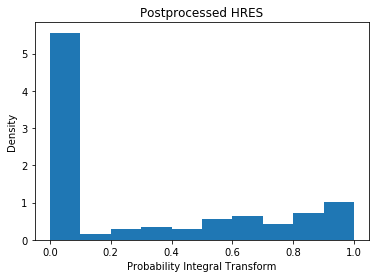

In [8]:
X = rain[["HRES"]][0:4*365]
y = rain["obs"][0:4*365]
fit = idr.idr(y = y, X = X)
data = rain[["HRES"]][4*365:8*365]
obs = rain["obs"][4*365:8*365]
preds = fit.predict(data = data)
idrPIT = preds.pit(y = obs, seed = 123)
a, b, x = plt.hist(idrPIT, density = True)
plt.title("Postprocessed HRES")
plt.xlabel("Probability Integral Transform")
plt.ylabel("Density")
plt.show()

## Example 4: plot()

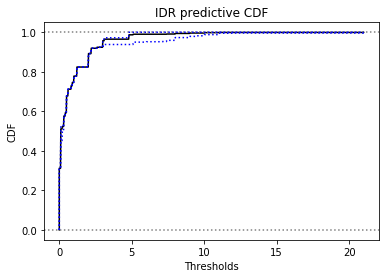

In [8]:
X = rain[["HRES"]][0:2*365]
y = rain["obs"][0:2*365]
fit = idr.idr(y = y, X = X)
data = pd.DataFrame({"HRES": [1], "CTR": [0]}, columns = ["HRES", "CTR"])
preds = fit.predict(data = data)
preds.plot() 